# dynamicTimeWarpingTest

In [1]:
import librosa
import librosa.display

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import time
from IPython.display import Audio, IFrame, display

In [2]:
#load data
assets = r"D:\z_Downloads\Datenset_Zauberfloete\data"
x_name = "WAM-79__Track2_Channel1.wav"
x_offset = 0
x_duration = 15
x_path = assets + "\\" + x_name
x_figTitle = x_name +" (" + str(x_offset) + "s - " + str(x_offset + x_duration) + "s)"

y_name = "WAM-100__Track2_Channel2.wav"
y_offset = 0
y_duration = 180
y_path = assets + "\\" + y_name
y_figTitle = y_name +" (" + str(y_offset) + "s - " + str(y_offset + y_duration) + "s)"

sampleRate = 22050
x_data, sr = librosa.load(path= x_path, sr= sampleRate, offset= x_offset, duration= x_duration)
y_data, sr = librosa.load(path= y_path, sr= sampleRate, offset= y_offset, duration= y_duration)

In [3]:
#feature extraction 
hopLength = 512
hz = sampleRate / hopLength # ~10.77

x_chroma = librosa.feature.chroma_cens(x_data, sr=sampleRate, hop_length= hopLength)
y_chroma = librosa.feature.chroma_cens(y_data, sr=sampleRate, hop_length= hopLength)

start: 00:00:02
end:   00:00:12


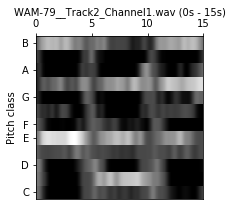

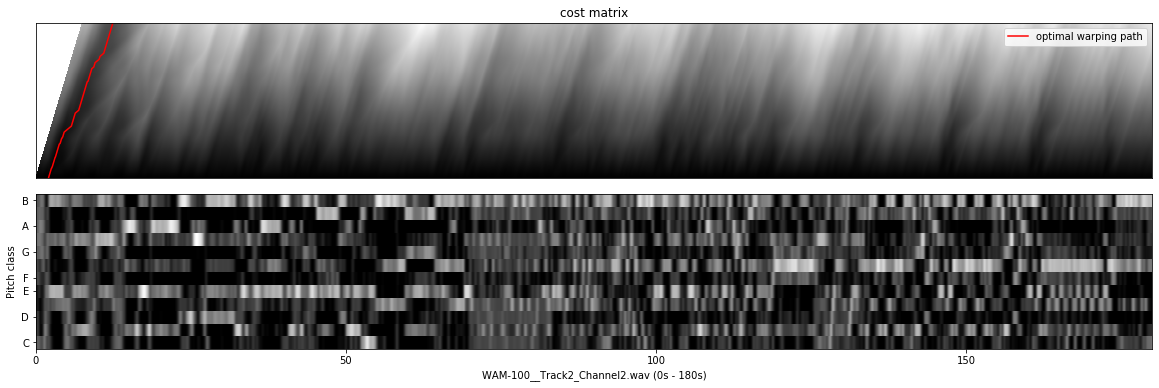

In [28]:
#dynamic time warping
stepSizesSigma=np.array([[1, 1], [1, 2], [2, 1]])

D, wp = librosa.sequence.dtw(x_chroma, y_chroma, metric='euclidean', step_sizes_sigma=stepSizesSigma, weights_add=np.array([0, 0, 0]), weights_mul=np.array([1, 1, 1]), subseq=True)

segFoundStart = int(round((wp[-1][1]) / hz))
segFoundEnd = int(round((wp[0][1]) / hz))


print("start: " + time.strftime('%H:%M:%S', time.gmtime(segFoundStart)))
print("end:   " + time.strftime('%H:%M:%S', time.gmtime(segFoundEnd)))


#visualisation
fig1, ax1 = plt.subplots(nrows=1, figsize=(3, 3))

librosa.display.specshow(x_chroma, y_axis='chroma', x_axis='s', cmap='gray', ax=ax1)
ax1.xaxis.tick_top()
ax1.set_xlabel(x_figTitle)
ax1.xaxis.set_label_position('top') 

fig1.subplots_adjust(hspace = 0.1)


fig2, ax2 = plt.subplots(nrows=2, figsize=(20, 6))

librosa.display.specshow(D, y_axis='s', x_axis='s', cmap='gray', ax=ax2[0])
ax2[0].set(title= "cost matrix", xLabel = "", yLabel = "")
ax2[0].plot(wp[:, 1]/hz, wp[:, 0]/hz, label='optimal warping path', color='r')
ax2[0].legend()
ax2[0].get_xaxis().set_visible(False)
ax2[0].get_yaxis().set_visible(False)

librosa.display.specshow(y_chroma, y_axis='chroma', x_axis='s', cmap='gray', ax=ax2[1])
ax2[1].set_xlabel(y_figTitle)


fig2.subplots_adjust(hspace = 0.1)

In [5]:
print("X: \t\t%s"% (x_figTitle))
print("Y: \t\t%s"% (y_figTitle))
print("chroma hz: \t%f"% (hz))
print("X chroma size: \t%i Frames (%fs)" % (len(x_chroma[0]), len(x_chroma[0])/hz))
print("Y chroma size: \t%i Frames (%fs)" % (len(y_chroma[0]), len(y_chroma[0])/hz))
print("cost matrix: \t(%i, %i)" % (len(D), len(D[0])))
print("warping path: \t%i - %i (%fs - %fs)" % (wp[-1][1], wp[0][1], wp[-1][1]/hz, wp[0][1]/hz))

X: 		WAM-79__Track2_Channel1.wav (0s - 15s)
Y: 		WAM-100__Track2_Channel2.wav (0s - 180s)
chroma hz: 	43.066406
X chroma size: 	646 Frames (15.000091s)
Y chroma size: 	7752 Frames (180.001088s)
cost matrix: 	(646, 7752)
warping path: 	87 - 534 (2.020136s - 12.399456s)


In [6]:
y, sr = librosa.load(path= y_path, sr= sampleRate, offset = segFoundStart, duration = segFoundEnd - segFoundStart)
display(Audio(y, rate = sr))